In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

/home/yufei/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
def show(img_path):
    """
        img_path: input such as './logs/inp_6.png'
    """
    index = img_path[::-1].find('/')
    prefix = img_path[:-index]
    suffix = img_path[-index+3:]
    gt_p = prefix + 'gt' + suffix
    pred_p = prefix + 'pred' + suffix
    plt.figure()
    img = plt.imread(img_path)
    plt.imshow(img)
    l = [ gt_p, pred_p]
    for i in l:
        plt.figure()
        img = plt.imread(i)
        plt.imshow(img, cmap='inferno')

    plt.show()

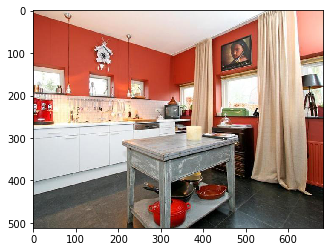

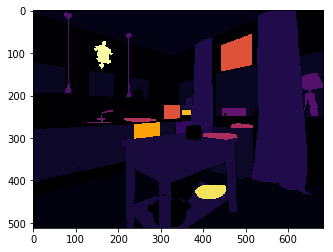

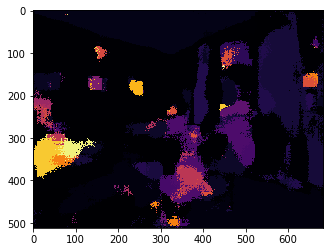

In [7]:
show('./logs/inp_5.png')

In [36]:
import read_MITSceneParsingData as scene_parsing
import BatchDatasetReader as dataset
import sys

In [34]:
data_dir= "Data_zoo/MIT_SceneParsing/"   # 存放数据集的路径，需要提前下载
data_name="ADEChallengeData2016"
train_records, valid_records = scene_parsing.read_dataset(data_dir,data_name)

Found pickle file!


In [35]:
train_records

[{'annotation': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/annotations/training/ADE_train_00001784.png',
  'filename': 'ADE_train_00001784',
  'image': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/images/training/ADE_train_00001784.jpg'},
 {'annotation': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/annotations/training/ADE_train_00014266.png',
  'filename': 'ADE_train_00014266',
  'image': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/images/training/ADE_train_00014266.jpg'},
 {'annotation': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/annotations/training/ADE_train_00010119.png',
  'filename': 'ADE_train_00010119',
  'image': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/images/training/ADE_train_00010119.jpg'},
 {'annotation': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/annotations/training/ADE_train_00005643.png',
  'filename': 'ADE_train_00005643',
  'image': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/images/training/ADE_train_00005643.jpg'},
 {'annotatio

In [37]:
sys.getsizeof(train_records)

171120

In [38]:
image_options = {'resize': True, 'resize_size': 224}
train_dataset_reader = dataset.BatchDatset(train_records, image_options)

Initializing Batch Dataset Reader...
{'resize': True, 'resize_size': 224}
(20210, 224, 224, 3)
(20210, 224, 224, 1)


In [49]:
train_dataset_reader.images

array([[[[ 34,  53,  60],
         [ 35,  54,  61],
         [ 34,  53,  60],
         ...,
         [ 30,  50,  59],
         [ 30,  50,  59],
         [ 30,  50,  59]],

        [[ 31,  50,  57],
         [ 33,  52,  59],
         [ 32,  51,  58],
         ...,
         [ 30,  50,  59],
         [ 30,  50,  59],
         [ 30,  50,  59]],

        [[ 33,  52,  59],
         [ 32,  51,  58],
         [ 32,  51,  58],
         ...,
         [ 28,  48,  57],
         [ 29,  49,  58],
         [ 30,  50,  59]],

        ...,

        [[ 30,  48,  58],
         [ 31,  49,  59],
         [ 32,  50,  60],
         ...,
         [ 29,  48,  55],
         [ 29,  48,  55],
         [ 31,  50,  57]],

        [[ 27,  47,  56],
         [ 26,  46,  55],
         [ 29,  49,  58],
         ...,
         [ 30,  48,  58],
         [ 31,  49,  59],
         [ 31,  49,  59]],

        [[ 30,  50,  59],
         [ 27,  47,  56],
         [ 28,  48,  57],
         ...,
         [ 29,  47,  57],
        

In [41]:
sys.getsizeof(train_dataset_reader.images)/1024**

3042171024

In [43]:
np.random.randint(0, train_dataset_reader.images.shape[0], size=[2]).tolist()

[17623, 18946]

In [46]:
sys.getsizeof(train_dataset_reader.annotations)

1014057104

In [47]:
perm = np.arange(train_dataset_reader.images.shape[0])
np.random.shuffle(perm)

In [48]:
perm

array([15229, 11557, 16033, ...,  6259,  2325, 17331])

In [50]:
train_dataset_reader.images = train_dataset_reader.images[perm]  #？？？？？？？？？？？？？？

In [51]:
train_dataset_reader.images

array([[[[ 87,  81,  59],
         [ 89,  83,  61],
         [ 87,  81,  59],
         ...,
         [110, 110, 112],
         [110, 110, 112],
         [110, 110, 112]],

        [[ 90,  84,  62],
         [ 92,  86,  64],
         [ 90,  84,  62],
         ...,
         [112, 112, 114],
         [112, 112, 114],
         [111, 111, 113]],

        [[ 91,  85,  63],
         [ 92,  86,  64],
         [ 91,  85,  63],
         ...,
         [115, 115, 117],
         [115, 115, 117],
         [114, 114, 116]],

        ...,

        [[ 92,  97,  74],
         [ 95, 100,  77],
         [ 97, 102,  79],
         ...,
         [ 52,  39,  30],
         [ 53,  40,  31],
         [ 56,  43,  34]],

        [[ 91,  96,  73],
         [ 95, 100,  77],
         [ 98, 103,  80],
         ...,
         [ 52,  38,  27],
         [ 52,  38,  27],
         [ 49,  35,  24]],

        [[ 93,  98,  75],
         [ 94,  99,  76],
         [ 95, 100,  77],
         ...,
         [ 51,  35,  22],
        

In [54]:
import numpy as np

In [55]:
a = np.array([1,2,3])

In [56]:
perm = np.arange(a.shape[0])
np.random.shuffle(perm)

In [58]:
id(a)

140520798812480

In [59]:
a = a[:]

In [60]:
id(a)

140520798812080